## Homework #6.1 - tSNE Algorithm

### Overview:
I've learned the PCA Algorithm - for dimensionality reduction, that is a linear dimensionality reduction
method that focuses on preserving the global structure of data by identifying the directions
(principal components) that maximize variance. There is another algorithm
called tSNE (t-distributed stochastic neighbor embedding), that is used for the same purpose, but
is a non-linear dimensionality reduction technique specifically designed for visualizing
high-dimensional data in 2D or 3D spaces.

### Task:
In the first, you are going to work with the Iris Data Set.
* Load the Data Set (https://bit.ly/3WiUJ7W)
* Plot the first 3 columns of the Data Set and the target column in a
3d scatter plot.

    HINT: Use the target column as a hue for the points.

    LINK: (https://bit.ly/3SRIsEJ)

* Create an instance of sklearn and implement a tSNE algorithm.
* Apply StandardScaler from sklearn on the data.
* Train created instance of tSNE on the iris data.

* Try to conclude what you see by comparing the results of each
algorithm and the 3d scatter plot you made before.
* Retrain a sklearn tSNE model on the iris Data Set with n components
set to 1.
* Create a line plot of the explained variance ratio.
* Try to make a conclusion based on that plot.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

In [2]:
dataset_iris: pd.DataFrame = load_iris(as_frame=True).frame

In [3]:
dataset_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
dataset_iris.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [5]:
dataset_first_columns = pd.concat([dataset_iris.iloc[:, :3], dataset_iris["target"]], axis='columns')
dataset_first_columns

,sepal length (cm),sepal width (cm),petal length (cm),target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


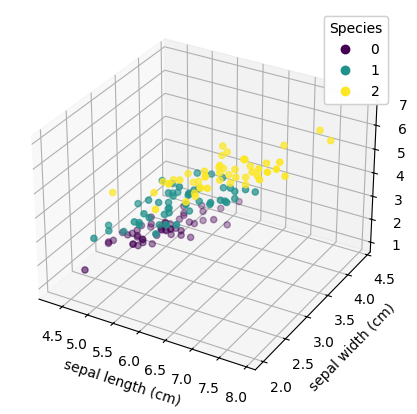

In [6]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(projection='3d')
scatter_plot = ax.scatter(dataset_first_columns.iloc[:, 0], dataset_first_columns.iloc[:, 1], dataset_first_columns.iloc[:, 2], c=dataset_first_columns.iloc[:, 3], cmap='viridis')
ax.set_xlabel(dataset_first_columns.columns[0])
ax.set_ylabel(dataset_first_columns.columns[1])
ax.set_zlabel(dataset_first_columns.columns[2])

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

In [7]:
X = dataset_iris.iloc[:, :4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y = dataset_iris['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [9]:
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [10]:
X_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


Next, I train a TSNE model in order to obtain the reduced dataset. However, there is one very important parameter - perplexity. It can be thought of as the trade-off parameter
between preserving local and global structure. Lower values will emphasise local structure, while larger values will do a better job at preserving global structure. The parameter
is, in a sense, a guess about the number of close neighbors each point has. I will present several values of perplexity and how they affect the dataset representation.

In [12]:
tSNE_sklearn = TSNE(n_components=2, max_iter=1000, random_state=42, perplexity=10)
tSNE_sklearn_features_10 = tSNE_sklearn.fit_transform(X=X_scaled_df)
tSNE_sklearn_features_10

array([[-2.5381155e+01,  2.4258299e+01],
       [-3.4070271e+01,  1.0332845e+01],
       [-2.9192787e+01,  1.2105529e+01],
       [-3.0349682e+01,  1.0012693e+01],
       [-2.2196241e+01,  2.4539371e+01],
       [-1.5294100e+01,  3.0587130e+01],
       [-2.4706015e+01,  1.8943949e+01],
       [-2.6897110e+01,  2.2073547e+01],
       [-3.0866825e+01,  6.3595486e+00],
       [-3.2903709e+01,  1.2499753e+01],
       [-1.8422312e+01,  3.0705227e+01],
       [-2.5620461e+01,  2.0057781e+01],
       [-3.2904549e+01,  9.6618509e+00],
       [-2.9462173e+01,  6.9318161e+00],
       [-1.4977244e+01,  3.3135784e+01],
       [-1.2876234e+01,  3.3764629e+01],
       [-1.5553260e+01,  3.1410667e+01],
       [-2.4633255e+01,  2.5076668e+01],
       [-1.6785564e+01,  3.2337696e+01],
       [-1.6989143e+01,  2.8469908e+01],
       [-2.8155090e+01,  2.6448557e+01],
       [-1.7991932e+01,  2.7834877e+01],
       [-2.1780363e+01,  2.1871328e+01],
       [-2.9875868e+01,  2.2864862e+01],
       [-2.62992

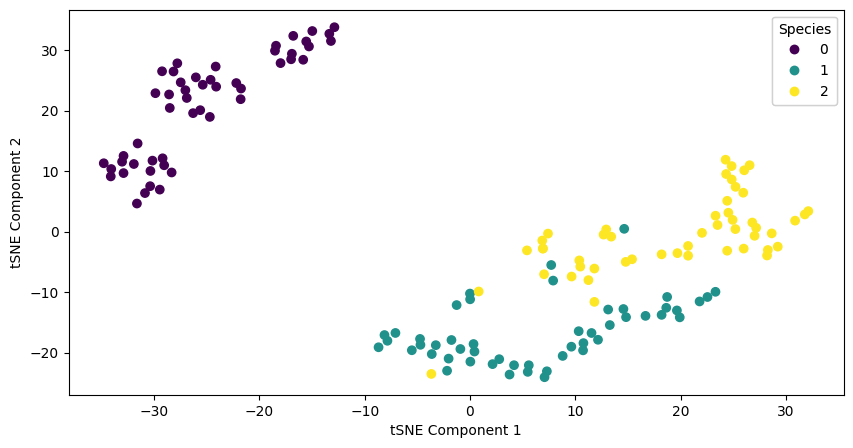

In [13]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()
scatter_plot = ax.scatter(tSNE_sklearn_features_10[:, 0], tSNE_sklearn_features_10[:, 1], c=y, cmap='viridis')
ax.set_xlabel("tSNE Component 1")
ax.set_ylabel("tSNE Component 2")

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

In [14]:
tSNE_sklearn.kl_divergence_

0.30035853385925293

In [15]:
tSNE_sklearn = TSNE(n_components=2, max_iter=1000, random_state=42, perplexity=50)
tSNE_sklearn_features_50 = tSNE_sklearn.fit_transform(X=X_scaled_df)
tSNE_sklearn_features_50

array([[ 8.4410019e+00, -7.2819895e-01],
       [ 6.9357853e+00, -6.5785158e-01],
       [ 7.4290819e+00, -1.1795424e+00],
       [ 7.1118283e+00, -1.2004679e+00],
       [ 8.6658468e+00, -1.1337506e+00],
       [ 9.4975395e+00, -7.0453578e-01],
       [ 7.8944392e+00, -1.4656242e+00],
       [ 8.0549316e+00, -8.5442710e-01],
       [ 6.5574970e+00, -1.1106218e+00],
       [ 7.2229295e+00, -5.8943176e-01],
       [ 9.0675259e+00, -4.6220338e-01],
       [ 7.9755793e+00, -1.2526486e+00],
       [ 6.8853650e+00, -8.0865717e-01],
       [ 6.7528143e+00, -1.3428092e+00],
       [ 9.7740669e+00, -5.2801269e-01],
       [ 1.0138789e+01, -7.5656164e-01],
       [ 9.4899378e+00, -6.9297057e-01],
       [ 8.4502077e+00, -7.3129016e-01],
       [ 9.4094191e+00, -3.7834191e-01],
       [ 9.1837254e+00, -1.0960455e+00],
       [ 8.3094730e+00, -2.0199212e-01],
       [ 8.9716721e+00, -1.0046812e+00],
       [ 8.4410658e+00, -1.6038097e+00],
       [ 7.8277845e+00, -3.3966672e-01],
       [ 7.98130

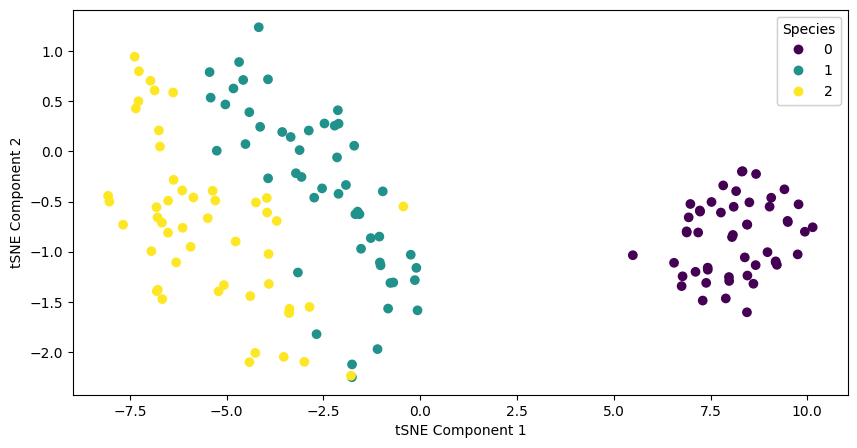

In [16]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()
scatter_plot = ax.scatter(tSNE_sklearn_features_50[:, 0], tSNE_sklearn_features_50[:, 1], c=y, cmap='viridis')
ax.set_xlabel("tSNE Component 1")
ax.set_ylabel("tSNE Component 2")

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

In [17]:
tSNE_sklearn.kl_divergence_

0.08434529602527618

In [18]:
tSNE_sklearn = TSNE(n_components=2, max_iter=1000, random_state=42, perplexity=100)
tSNE_sklearn_features_100 = tSNE_sklearn.fit_transform(X=X_scaled_df)
tSNE_sklearn_features_100

array([[-1.42310314e+01, -2.29358241e-01],
       [-1.46073914e+01, -6.97540462e-01],
       [-1.43766603e+01, -6.15407526e-01],
       [-1.44711647e+01, -7.05498874e-01],
       [-1.41255875e+01, -1.95529133e-01],
       [-1.41179056e+01,  1.77594513e-01],
       [-1.41989689e+01, -4.90207851e-01],
       [-1.43058329e+01, -3.39760929e-01],
       [-1.45758581e+01, -8.89103830e-01],
       [-1.45037727e+01, -6.41198158e-01],
       [-1.41697969e+01,  2.92033479e-02],
       [-1.42532663e+01, -4.21849042e-01],
       [-1.45399857e+01, -7.41762221e-01],
       [-1.44126730e+01, -8.64978731e-01],
       [-1.40390348e+01,  2.81552732e-01],
       [-1.39566460e+01,  4.67280030e-01],
       [-1.40815716e+01,  1.56323358e-01],
       [-1.42792797e+01, -2.01003268e-01],
       [-1.41936512e+01,  2.00481832e-01],
       [-1.40821543e+01,  8.30798596e-03],
       [-1.44827461e+01, -1.46618456e-01],
       [-1.41570511e+01, -3.52751054e-02],
       [-1.40267143e+01, -3.42112035e-01],
       [-1.

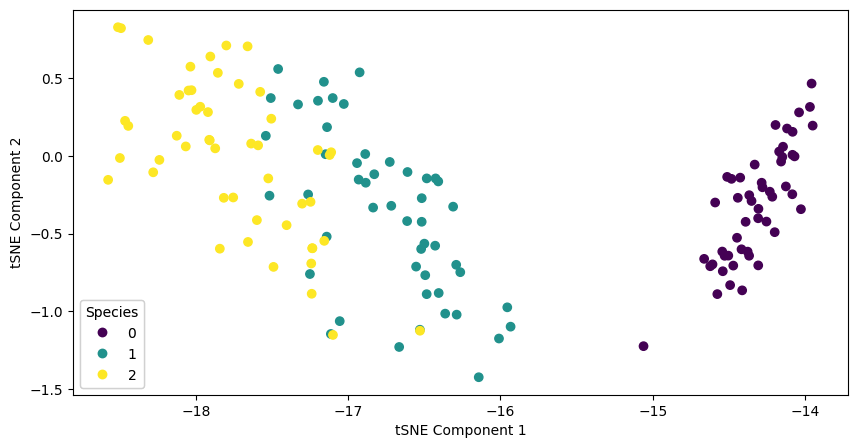

In [19]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()
scatter_plot = ax.scatter(tSNE_sklearn_features_100[:, 0], tSNE_sklearn_features_100[:, 1], c=y, cmap='viridis')
ax.set_xlabel("tSNE Component 1")
ax.set_ylabel("tSNE Component 2")

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

In [20]:
tSNE_sklearn.kl_divergence_

0.01211498398333788

In [21]:
tSNE_sklearn = TSNE(n_components=2, max_iter=1000, random_state=42, perplexity=140)
tSNE_sklearn_features_140 = tSNE_sklearn.fit_transform(X=X_scaled_df)
tSNE_sklearn_features_140

array([[-7.5939536 ,  0.5066411 ],
       [-7.617072  ,  0.810449  ],
       [-7.657305  ,  0.70483303],
       [-7.6555223 ,  0.7704386 ],
       [-7.6109905 ,  0.46296635],
       [-7.512553  ,  0.300887  ],
       [-7.6594377 ,  0.6020925 ],
       [-7.6019063 ,  0.5719908 ],
       [-7.6848974 ,  0.8764162 ],
       [-7.6286554 ,  0.7519013 ],
       [-7.547627  ,  0.3836112 ],
       [-7.6274147 ,  0.5884364 ],
       [-7.6464515 ,  0.80722034],
       [-7.739726  ,  0.81324977],
       [-7.532623  ,  0.22305799],
       [-7.5268097 ,  0.09088018],
       [-7.5404215 ,  0.29826123],
       [-7.5781946 ,  0.50841075],
       [-7.4789257 ,  0.31580114],
       [-7.5798078 ,  0.36377305],
       [-7.5272784 ,  0.544107  ],
       [-7.5589867 ,  0.40938574],
       [-7.702416  ,  0.48490685],
       [-7.5215526 ,  0.6434222 ],
       [-7.6060843 ,  0.5987206 ],
       [-7.589026  ,  0.81355   ],
       [-7.56067   ,  0.58362114],
       [-7.572588  ,  0.49949622],
       [-7.579906  ,

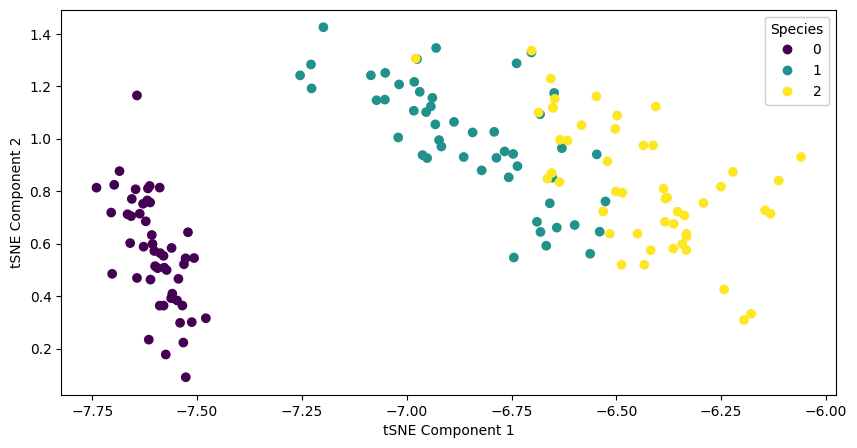

In [22]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot()
scatter_plot = ax.scatter(tSNE_sklearn_features_140[:, 0], tSNE_sklearn_features_140[:, 1], c=y, cmap='viridis')
ax.set_xlabel("tSNE Component 1")
ax.set_ylabel("tSNE Component 2")

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

In [23]:
tSNE_sklearn.kl_divergence_

0.0016107975970953703

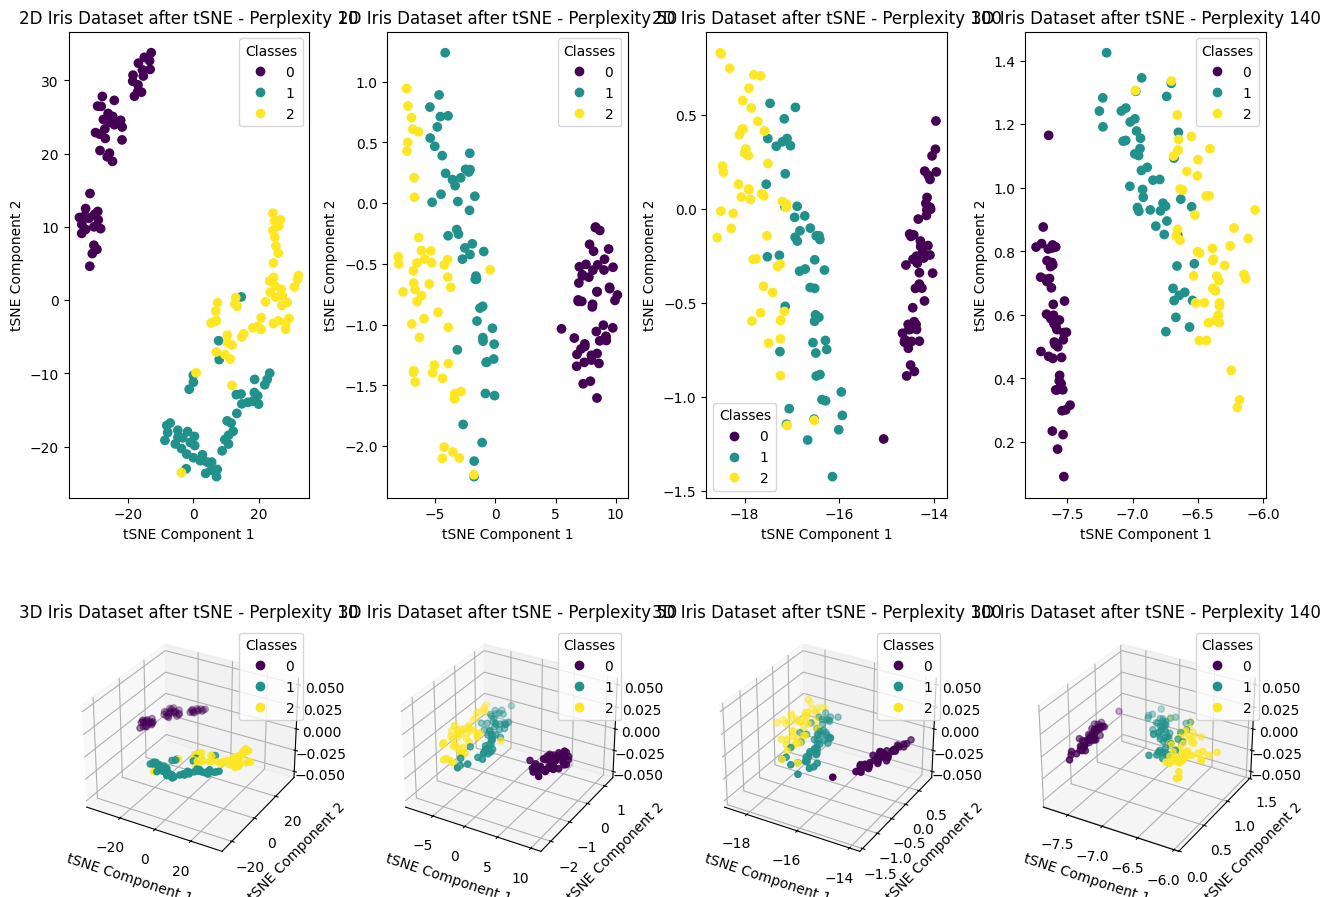

In [24]:
fig = plt.figure(figsize=(13, 10))

ax1 = fig.add_subplot(2, 4, 1)
scatter_1 = ax1.scatter(tSNE_sklearn_features_10[:, 0], tSNE_sklearn_features_10[:, 1], c=y, cmap='viridis')
ax1.set_title("2D Iris Dataset after tSNE - Perplexity 10")
ax1.set_xlabel("tSNE Component 1")
ax1.set_ylabel("tSNE Component 2")
handles, labels = scatter_1.legend_elements()
ax1.legend(handles, labels, title="Classes")

ax2 = fig.add_subplot(2, 4, 2)
scatter_2 = ax2.scatter(tSNE_sklearn_features_50[:, 0], tSNE_sklearn_features_50[:, 1], c=y, cmap='viridis')
ax2.set_title("2D Iris Dataset after tSNE - Perplexity 50")
ax2.set_xlabel("tSNE Component 1")
ax2.set_ylabel("tSNE Component 2")
handles, labels = scatter_2.legend_elements()
ax2.legend(handles, labels, title="Classes")

ax3 = fig.add_subplot(2, 4, 3)
scatter_3 = ax3.scatter(tSNE_sklearn_features_100[:, 0], tSNE_sklearn_features_100[:, 1], c=y, cmap='viridis')
ax3.set_title("2D Iris Dataset after tSNE - Perplexity 100")
ax3.set_xlabel("tSNE Component 1")
ax3.set_ylabel("tSNE Component 2")
handles, labels = scatter_3.legend_elements()
ax3.legend(handles, labels, title="Classes")

ax4 = fig.add_subplot(2, 4, 4)
scatter_4 = ax4.scatter(tSNE_sklearn_features_140[:, 0], tSNE_sklearn_features_140[:, 1], c=y, cmap='viridis')
ax4.set_title("3D Iris Dataset after tSNE - Perplexity 140")
ax4.set_xlabel("tSNE Component 1")
ax4.set_ylabel("tSNE Component 2")
handles, labels = scatter_4.legend_elements()
ax4.legend(handles, labels, title="Classes")

ax5 = fig.add_subplot(2, 4, 5, projection='3d')
scatter_5 = ax5.scatter(tSNE_sklearn_features_10[:, 0], tSNE_sklearn_features_10[:, 1], c=y, cmap='viridis')
ax5.set_title("3D Iris Dataset after tSNE - Perplexity 10")
ax5.set_xlabel("tSNE Component 1")
ax5.set_ylabel("tSNE Component 2")
handles, labels = scatter_5.legend_elements()
ax5.legend(handles, labels, title="Classes")

ax6 = fig.add_subplot(2, 4, 6, projection='3d')
scatter_6 = ax6.scatter(tSNE_sklearn_features_50[:, 0], tSNE_sklearn_features_50[:, 1], c=y, cmap='viridis')
ax6.set_title("3D Iris Dataset after tSNE - Perplexity 50")
ax6.set_xlabel("tSNE Component 1")
ax6.set_ylabel("tSNE Component 2")
handles, labels = scatter_6.legend_elements()
ax6.legend(handles, labels, title="Classes")

ax7 = fig.add_subplot(2, 4, 7, projection='3d')
scatter_7 = ax7.scatter(tSNE_sklearn_features_100[:, 0], tSNE_sklearn_features_100[:, 1], c=y, cmap='viridis')
ax7.set_title("3D Iris Dataset after tSNE - Perplexity 100")
ax7.set_xlabel("tSNE Component 1")
ax7.set_ylabel("tSNE Component 2")
handles, labels = scatter_7.legend_elements()
ax7.legend(handles, labels, title="Classes")

ax8 = fig.add_subplot(2, 4, 8, projection='3d')
scatter_8 = ax8.scatter(tSNE_sklearn_features_140[:, 0], tSNE_sklearn_features_140[:, 1], c=y, cmap='viridis')
ax8.set_title("3D Iris Dataset after tSNE - Perplexity 140")
ax8.set_xlabel("tSNE Component 1")
ax8.set_ylabel("tSNE Component 2")
handles, labels = scatter_8.legend_elements()
ax8.legend(handles, labels, title="Classes")

plt.tight_layout()
plt.show()

In [25]:
dataset_digits = load_digits(as_frame=True)
dataset_images = dataset_digits.images
dataset_digits_frame: pd.DataFrame = dataset_digits.frame
X_digits = dataset_digits_frame.drop(columns=['target'])
y_digits = dataset_digits_frame['target']

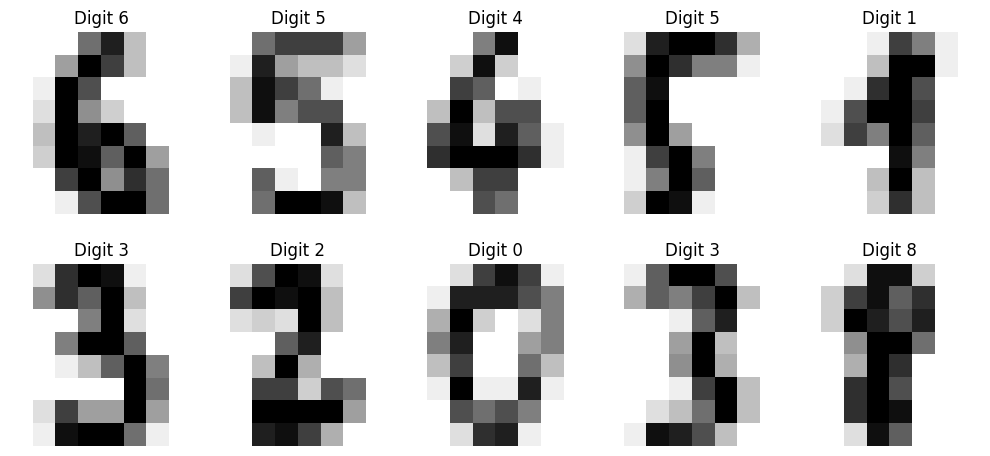

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for index, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, len(dataset_digits_frame.index))
    random_training_example = dataset_digits_frame.iloc[random_index, :]
    ax.imshow(dataset_images[random_index], cmap='binary')
    ax.set_title(f"Digit {dataset_digits_frame.iloc[random_index, -1]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [27]:
standard_digits_scaler = StandardScaler()
X_digits_scaled = standardScaler.fit_transform(X_digits)

In [28]:
tSNE_sklearn = TSNE(n_components=2, max_iter=1000, random_state=42, perplexity=400)
tSNE_sklearn_features = tSNE_sklearn.fit_transform(X=X_digits_scaled)
tSNE_sklearn_features

array([[ 2.1891012 , -6.506885  ],
       [ 1.4272647 ,  3.294045  ],
       [ 2.4028828 ,  1.8002386 ],
       ...,
       [ 0.08063056,  1.2780961 ],
       [-0.36225516, -4.279458  ],
       [-2.5052762 ,  0.179567  ]], shape=(1797, 2), dtype=float32)

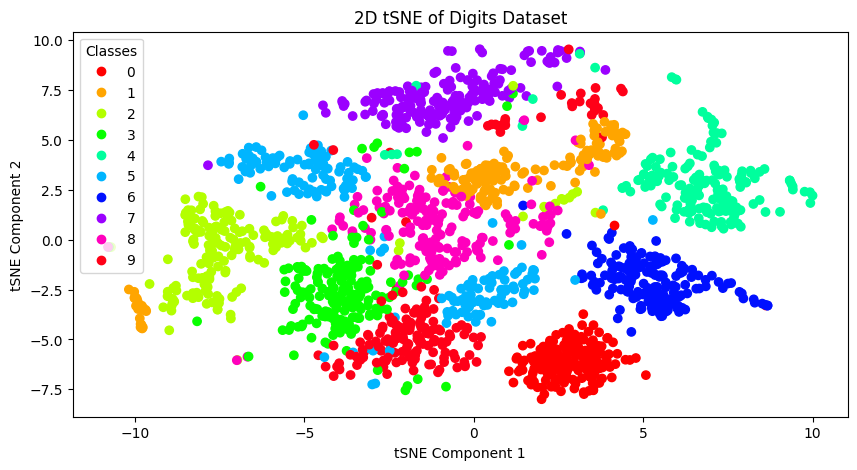

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(tSNE_sklearn_features[:, 0], tSNE_sklearn_features[:, 1], c=y_digits, cmap='hsv', label=y_digits)
handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('tSNE Component 1')
ax.set_ylabel('tSNE Component 2')
ax.set_title('2D tSNE of Digits Dataset')

plt.show()